In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

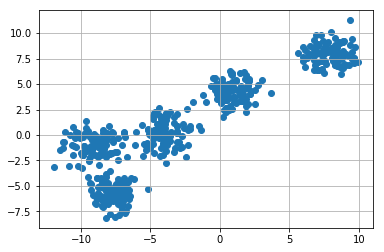

In [41]:
x,y = make_blobs(n_samples = 500,n_features=2,centers=5,random_state=3)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [42]:
k = 5
clusters = []
colour = ['green','red','yellow','blue','orange']
for ix in range(k):
    centre = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {'color' : colour[ix],
               'points' : points,
               'centre' : centre}
    clusters.append(cluster)

    

In [43]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [44]:
def AssignPointToCluster(clusters):
    for i in range(x.shape[0]):
        dist = []
        for ix in range(k):
            d = distance(x[i],clusters[ix]['centre'])
            dist.append(d)
        index = np.argmin(dist)
        clusters[index]['points'].append(x[i])

def UpdateCluster(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0]>0:
            new_u  = pts.mean(axis = 0)
            clusters[i]['centre'] = new_u
            clusters[i]['points'] = []
def PlotClusters(clusters):
    for i in range(k):
        x = clusters[i]['points']
        x = np.array(x)
        try:
            plt.scatter(x[:,0],x[:,1])
        except:
            pass
        uk = clusters[i]['centre']
        plt.scatter(uk[0],uk[1],c = 'black')


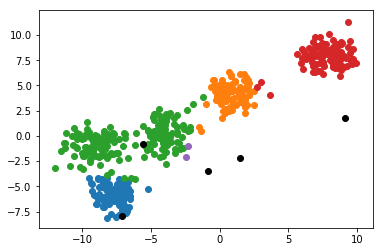

In [45]:
AssignPointToCluster(clusters)
PlotClusters(clusters)

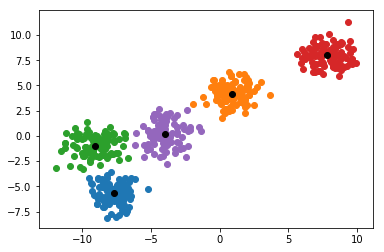

In [51]:
AssignPointToCluster(clusters)
PlotClusters(clusters)
UpdateCluster(clusters)


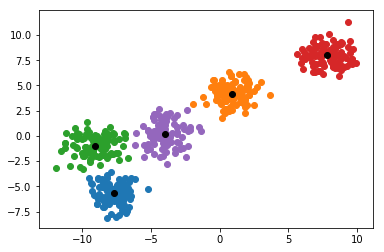

In [52]:
AssignPointToCluster(clusters)
PlotClusters(clusters)
UpdateCluster(clusters)

# Using Sklearn

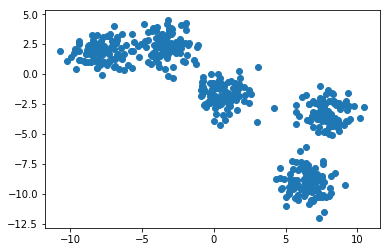

In [56]:
from sklearn.cluster import KMeans
x,y = make_blobs(n_samples = 500,n_features=2,centers=5,random_state=6)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [57]:
k_m = KMeans(n_clusters=5)

In [58]:
k_m.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
centres = k_m.cluster_centers_
pred = k_m.labels_


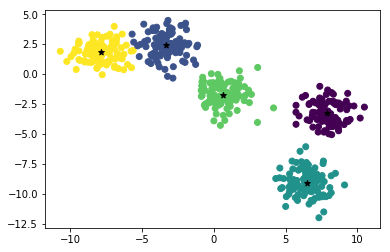

In [65]:
plt.scatter(x[:,0],x[:,1],c = pred)
plt.scatter(centres[:,0],centres[:,1],marker='*',color = 'black')
plt.show()

# DBSCAN

In [66]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples = 200,noise = 0.1)

[]

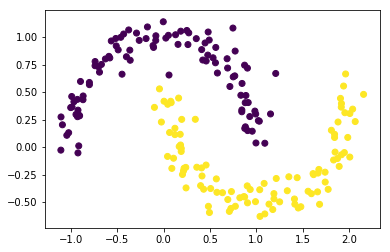

In [68]:
plt.scatter(x[:,0],x[:,1],c = y)
plt.plot()

In [70]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.21,min_samples=5)

In [71]:
db.fit(x)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [72]:
y_pred = db.fit_predict(x)

[]

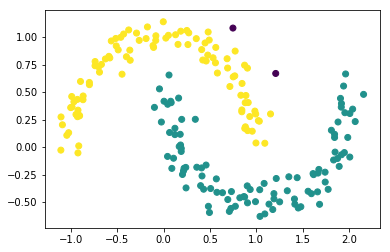

In [73]:
plt.scatter(x[:,0],x[:,1],c = y_pred)
plt.plot()